![tracker](https://us-central1-vertex-ai-mlops-369716.cloudfunctions.net/pixel-tracking?path=statmike%2Fvertex-ai-mlops%2FFramework+Workflows%2FCatBoost&file=CatBoost+Overview.ipynb)
<!--- header table --->
<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Framework%20Workflows/CatBoost/CatBoost%20Overview.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo">
      <br>Run in<br>Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https%3A%2F%2Fraw.githubusercontent.com%2Fstatmike%2Fvertex-ai-mlops%2Fmain%2FFramework%2520Workflows%2FCatBoost%2FCatBoost%2520Overview.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo">
      <br>Run in<br>Colab Enterprise
    </a>
  </td>      
  <td style="text-align: center">
    <a href="https://github.com/statmike/vertex-ai-mlops/blob/main/Framework%20Workflows/CatBoost/CatBoost%20Overview.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      <br>View on<br>GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/statmike/vertex-ai-mlops/main/Framework%20Workflows/CatBoost/CatBoost%20Overview.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      <br>Open in<br>Vertex AI Workbench
    </a>
  </td>
</table>

# CatBoost Overview

This notebook provides a comprehensive guide to building a CatBoost classifier, with a focus on:

- Leveraging CatBoost's efficient gradient boosting algorithm for classification tasks.
- Creating a robust and portable model suitable for deployment.
- Structuring the workflow for clear data handling, training, and evaluation.
- Integrating with Vertex AI Experiments for experiment tracking and analysis.
- Handling data preprocessing and feature engineering within the CatBoost workflow.

## Core Concepts

**CatBoost:** An open-source gradient boosting library developed by Yandex. CatBoost excels at handling categorical features, preventing overfitting, and providing high accuracy.

**Gradient Boosting:** A machine learning technique that combines multiple weak learners (typically decision trees) to create a strong predictive model. 1  CatBoost's implementation is particularly efficient and scalable.

**Vertex AI Experiments:** A managed service for tracking and analyzing machine learning experiments. It allows you to log metrics, parameters, and artifacts, making it easier to compare and reproduce experiments.

**BigQuery:** A serverless, highly scalable, and cost-effective multicloud data warehouse designed for business agility.

## Workflow Summary

This workflow covers the following key steps:

**Data Loading and Preprocessing:**
- Loading data from BigQuery using the google-cloud-bigquery library.
- Splitting the data into training, validation, and test sets.
- Preparing the data for CatBoost using the catboost.Pool object.

**CatBoost Model Definition:**
- Defining the CatBoost classifier model with custom parameters.
- Specifying the loss function and evaluation metrics.

**CatBoost Training:**
- Training the CatBoost model using the prepared train and validate datasets.
- Monitoring the training process and evaluating performance on the validation set.

**CatBoost Evaluation:**
- Evaluating the trained model on the test dataset using various metrics (accuracy, precision, recall, F1-score, average precision).
- Generating and visualizing the ROC curve.

**Vertex AI Experiments Integration:**
- Initializing a Vertex AI experiment and starting an experiment run.
- Logging model parameters, summary metrics, and classification metrics to the experiment run.
- Saving the trained model as a Vertex AI Model artifact.

**Model Saving and Loading:**
- Saving the trained CatBoost model to a local file and to Google Cloud Storage (GCS).
- Loading the model from GCS for future use.

**Key Advantages of This Workflow:**
- **Efficiency:** CatBoost's gradient boosting algorithm is highly efficient and scalable.
- **Accuracy:** CatBoost is known for its high accuracy, especially in handling categorical features.
- **Portability:** The trained model can be easily saved and loaded for deployment.
- **Reproducibility:** Vertex AI Experiments integration ensures reproducibility of experiments.
- **Clear Workflow:** The code is well-structured and modular, with clear separation of concerns (data loading, preprocessing, model training, evaluation, and experiment tracking).

This workflow provides a solid foundation for building and deploying CatBoost classification models, leveraging the strengths of the CatBoost library and Vertex AI Experiments.

---
## Colab Setup

To run this notebook in Colab run the cells in this section.  Otherwise, skip this section.

This cell will authenticate to GCP (follow prompts in the popup).

In [1]:
PROJECT_ID = 'statmike-mlops-349915' # replace with project ID

In [2]:
try:
    import google.colab
    from google.colab import auth
    auth.authenticate_user()
    !gcloud config set project {PROJECT_ID}
except Exception:
    pass

---
## Installs

The list `packages` contains tuples of package import names and install names.  If the import name is not found then the install name is used to install quitely for the current user.

In [3]:
# tuples of (import name, install name, min_version)
packages = [
    ('catboost', 'catboost'),
    ('sklearn', 'scikit-learn'),
    ('numpy', 'numpy'),
    ('google.cloud.aiplatform', 'google-cloud-aiplatform', '1.66.0'), 
    ('google.cloud.storage', 'google-cloud-storage'),
    ('google.cloud.bigquery', 'google-cloud-bigquery'), 
    ('shap', 'shap')
]

import importlib
install = False
for package in packages:
    if not importlib.util.find_spec(package[0]):
        print(f'installing package {package[1]}')
        install = True
        !pip install {package[1]} -U -q --user
    elif len(package) == 3:
        if importlib.metadata.version(package[0]) < package[2]:
            print(f'updating package {package[1]}')
            install = True
            !pip install {package[1]} -U -q --user

### API Enablement

In [4]:
!gcloud services enable aiplatform.googleapis.com

### Restart Kernel (If Installs Occured)

After a kernel restart the code submission can start with the next cell after this one.

In [5]:
if install:
    import IPython
    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)
    IPython.display.display(IPython.display.Markdown("""<div class=\"alert alert-block alert-warning\">
        <b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. The previous cells do not need to be run again⚠️</b>
        </div>"""))

---
## Setup

inputs:

In [6]:
project = !gcloud config get-value project
PROJECT_ID = project[0]
PROJECT_ID

'statmike-mlops-349915'

In [7]:
REGION = 'us-central1'
SERIES = 'frameworks'
EXPERIMENT = 'catboost-overview'

# Set the name of GCS Bucket to read/write to
GCS_BUCKET = PROJECT_ID

# Data source for this series of notebooks: Described above
BQ_SOURCE = 'bigquery-public-data.ml_datasets.ulb_fraud_detection'

# make this the BigQuery Project / Dataset / Table prefix to store results
BQ_PROJECT = PROJECT_ID
BQ_DATASET = SERIES.replace('-', '_')
BQ_TABLE = SERIES
BQ_REGION = REGION[0:2] # use a multi region

packages:

In [8]:
import tempfile, json, os, io

import catboost 
import catboost.utils
import sklearn.metrics #import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import shap

from google.cloud import aiplatform
from google.cloud import storage
from google.cloud import bigquery

clients:

In [9]:
# vertex ai clients
aiplatform.init(project = PROJECT_ID, location = REGION, experiment = SERIES)

# bigquery client
bq = bigquery.Client(project = PROJECT_ID)

# gcs storage client
gcs = storage.Client(project = GCS_BUCKET)
bucket = gcs.bucket(GCS_BUCKET)

Parameters:

In [10]:
DIR = f"files/{EXPERIMENT}"

Environment:

In [11]:
if not os.path.exists(DIR):
    os.makedirs(DIR)

---
## Review Source Data

This is a BigQuery public table of 284,807 credit card transactions classified as fradulant or normal in the column `Class`.
- The data can be researched further at this [Kaggle link](https://www.kaggle.com/mlg-ulb/creditcardfraud).
- Read mode about BigQuery public datasets [here](https://cloud.google.com/bigquery/public-data)

In order protect confidentiality, the original features have been transformed using [principle component analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) into 28 features named `V1, V2, ... V28` (float).  Two descriptive features are provided without transformation by PCA:
- `Time` (integer) is the seconds elapsed between the transaction and the earliest transaction in the table
- `Amount` (float) is the value of the transaction
 

### Review BigQuery table:

In [12]:
source_data = bq.query(f'SELECT * FROM `{BQ_SOURCE}` LIMIT 5').to_dataframe()
source_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,282.0,-0.356466,0.725418,1.971749,0.831343,0.369681,-0.107776,0.751610,-0.120166,-0.420675,...,0.020804,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401,0.0,0
1,14332.0,1.071950,0.340678,1.784068,2.846396,-0.751538,0.403028,-0.734920,0.205807,1.092726,...,-0.169632,-0.113604,0.067643,0.468669,0.223541,-0.112355,0.014015,0.021504,0.0,0
2,32799.0,1.153477,-0.047859,1.358363,1.480620,-1.222598,-0.481690,-0.654461,0.128115,0.907095,...,0.125514,0.480049,-0.025964,0.701843,0.417245,-0.257691,0.060115,0.035332,0.0,0
3,35799.0,-0.769798,0.622325,0.242491,-0.586652,0.527819,-0.104512,0.209909,0.669861,-0.304509,...,0.152738,0.255654,-0.130237,-0.660934,-0.493374,0.331855,-0.011101,0.049089,0.0,0
4,36419.0,1.047960,0.145048,1.624573,2.932652,-0.726574,0.690451,-0.627288,0.278709,0.318434,...,0.078499,0.658942,-0.067810,0.476882,0.526830,0.219902,0.070627,0.028488,0.0,0


In [13]:
source_data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       Int64
dtype: object

---
## Prepare Data Source

The data preparation includes adding splits for machine learning with a column named `splits` with 80% for training (`TRAIN`), 10% for validation (`VALIDATE`) and 10% for testing (`TEST`). Additionally, a unique identifier was added to each transaction, `transaction_id`. 

>These steps could be done locally at training but are instead done in the source system, BigQuery in this case, which provides several advantages:
>
>-   **Single Source of Truth:** A single data preparation can benefit multiple model training jobs for different architectures or even different team members working on the same model. This ensures consistency and avoids duplication of effort.
>-   **Leverage BigQuery's Power:** BigQuery is highly optimized for large-scale data processing. Performing these operations directly in BigQuery leverages its distributed processing capabilities, making the preparation significantly faster and more efficient than local processing, especially for massive datasets.
>-   **Reduced Data Movement:** Preparing the data in BigQuery reduces the amount of data that needs to be moved out of BigQuery and into the training environment. This minimizes latency and potential bottlenecks associated with data transfer.
>-   **Data Versioning and Reproducibility:** By preparing the splits and unique ID in BigQuery, the specific dataset used for training can be easily tracked and versioned. This enhances the reproducibility of experiments and makes it easier to understand the provenance of the data used in a particular model.
>-   **Simplified Training Pipeline:** The training pipeline becomes simpler because it can directly read pre-split data from BigQuery, eliminating the need for complex splitting logic within the training code.
>-   **Pre-calculated Joins and Features:** BigQuery can be used to pre-calculate joins and engineer new features that are beneficial for the model. This can improve model performance and further reduce the workload during the training phase.
>
>**Further Considerations:**
>
>-   **Data Governance and Security:** BigQuery offers robust data governance and security features. Performing data preparation within BigQuery allows you to maintain control over access and ensure data quality.
>-   **Scalability:** This approach is highly scalable. As your dataset grows, BigQuery can handle the increased workload without requiring significant changes to your data preparation pipeline.
>-   **Cost Optimization:** While moving large amounts of data out of BigQuery can incur costs, performing the preparation steps within BigQuery and only extracting the necessary data for training can often be more cost-effective.
>
>By preparing the data in BigQuery, you create a streamlined, efficient, and reproducible workflow (pipeline) that leverages the strengths of the platform and sets your machine learning models up for success.


### Create/Recall Dataset

In [14]:
dataset = bigquery.Dataset(f"{BQ_PROJECT}.{BQ_DATASET}")
dataset.location = BQ_REGION
bq_dataset = bq.create_dataset(dataset, exists_ok = True)

### Create/Recall Table With Preparation For ML

Copy the data from the source while adding columns:
- `transaction_id` as a unique identify for the row
    - Use the `GENERATE_UUID()` function
- `splits` column to randomly assign rows to 'TRAIN", "VALIDATE" and "TEST" groups
    - stratified sampling within the levels of `class` by first assigning row numbers within the levels of `class` then using the with a CASE statment to assign the `splits` level.

In [15]:
job = bq.query(f"""
#CREATE OR REPLACE TABLE
CREATE TABLE IF NOT EXISTS 
    `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}` AS
WITH
    add_id AS (
        SELECT *,
            GENERATE_UUID() transaction_id,
            ROW_NUMBER() OVER (PARTITION BY class ORDER BY RAND()) as rn
            FROM `{BQ_SOURCE}`
    )
SELECT * EXCEPT(rn),
    CASE 
        WHEN rn <= 0.8 * COUNT(*) OVER (PARTITION BY class) THEN 'TRAIN'
        WHEN rn <= 0.9 * COUNT(*) OVER (PARTITION BY class) THEN 'VALIDATE'
        ELSE 'TEST'
    END AS splits
FROM add_id
""")
job.result()
(job.ended-job.started).total_seconds()

0.265

In [16]:
raw_sample = bq.query(f'SELECT * FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}` LIMIT 5').to_dataframe()
raw_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,transaction_id,splits
0,122959.0,-1.327297,0.422904,1.617505,2.291196,2.375055,0.411735,0.213517,0.424743,-1.809624,...,0.192604,0.068281,-0.245725,-0.697654,0.038216,0.150059,0.0,0,c97b6e2f-603a-4dbe-9bca-0add881f2084,TEST
1,122312.0,-1.988557,-0.720301,0.863204,3.114494,1.847474,0.255881,0.580362,-0.083756,-0.939044,...,1.564951,0.546312,-0.548531,-0.746620,-0.748016,0.410640,0.0,0,791e403e-d59f-491d-b0b7-d8f8710c07fb,TEST
2,119592.0,2.139741,0.245651,-2.654856,0.178287,1.336991,-0.724664,0.906032,-0.436125,-0.528015,...,-0.216033,0.345316,0.747103,0.700184,-0.123739,-0.099989,0.0,0,d9e720c5-311d-4cf7-95cb-2256823803ba,TEST
3,114162.0,1.899800,0.368336,0.058981,3.734313,0.106120,0.707141,-0.472405,0.131502,-0.458634,...,0.168515,0.674750,-0.104164,0.041509,0.016028,-0.025852,0.0,0,1e2f3bb7-5c58-4f47-9c3d-d51e6298d6e3,TEST
4,36601.0,1.092339,-0.063143,1.345504,2.738232,-0.768844,0.857445,-0.842873,0.476848,0.501090,...,-0.159378,0.008694,0.568803,0.222004,0.032466,0.009505,0.0,0,b1ae958a-0801-453d-a838-b11b4306f559,TEST


### Review the number of records for each level of `Class` for each of the data splits:

In [17]:
bq.query(f"""
SELECT splits, class,
    count(*) as count,
    ROUND(count(*) * 100.0 / SUM(count(*)) OVER (PARTITION BY class), 2) AS percentage
FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
GROUP BY splits, class
""").to_dataframe()

,splits,class,count,percentage
0,TEST,1,50,10.16
1,TRAIN,1,393,79.88
2,VALIDATE,1,49,9.96
3,TEST,0,28432,10.00
4,TRAIN,0,227452,80.00
5,VALIDATE,0,28431,10.00


---
## CatBoost

Create a classification model with CatBoost!

In [18]:
fraud_ds = bq.query(f'SELECT * FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}` ').to_dataframe()

In [19]:
fraud_ds.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,transaction_id,splits
0,122959.0,-1.327297,0.422904,1.617505,2.291196,2.375055,0.411735,0.213517,0.424743,-1.809624,...,0.192604,0.068281,-0.245725,-0.697654,0.038216,0.150059,0.0,0,c97b6e2f-603a-4dbe-9bca-0add881f2084,TEST
1,122312.0,-1.988557,-0.720301,0.863204,3.114494,1.847474,0.255881,0.580362,-0.083756,-0.939044,...,1.564951,0.546312,-0.548531,-0.746620,-0.748016,0.410640,0.0,0,791e403e-d59f-491d-b0b7-d8f8710c07fb,TEST
2,119592.0,2.139741,0.245651,-2.654856,0.178287,1.336991,-0.724664,0.906032,-0.436125,-0.528015,...,-0.216033,0.345316,0.747103,0.700184,-0.123739,-0.099989,0.0,0,d9e720c5-311d-4cf7-95cb-2256823803ba,TEST
3,114162.0,1.899800,0.368336,0.058981,3.734313,0.106120,0.707141,-0.472405,0.131502,-0.458634,...,0.168515,0.674750,-0.104164,0.041509,0.016028,-0.025852,0.0,0,1e2f3bb7-5c58-4f47-9c3d-d51e6298d6e3,TEST
4,36601.0,1.092339,-0.063143,1.345504,2.738232,-0.768844,0.857445,-0.842873,0.476848,0.501090,...,-0.159378,0.008694,0.568803,0.222004,0.032466,0.009505,0.0,0,b1ae958a-0801-453d-a838-b11b4306f559,TEST


### Data Preparation

In [20]:
X = fraud_ds.drop(['Class', 'splits', 'transaction_id'], axis = 1)
y = fraud_ds.Class
splits = fraud_ds.splits

In [21]:
train = catboost.Pool(
    data = X.loc[splits[splits == 'TRAIN'].index],
    label = y.loc[splits[splits == 'TRAIN'].index]
)
validate = catboost.Pool(
    data = X.loc[splits[splits == 'VALIDATE'].index],
    label = y.loc[splits[splits == 'VALIDATE'].index]
)
test = catboost.Pool(
    data = X.loc[splits[splits == 'TEST'].index],
    label = y.loc[splits[splits == 'TEST'].index]
)

In [22]:
test.get_features()

array([[ 1.2295900e+05, -1.3272969e+00,  4.2290440e-01, ...,
         3.8215715e-02,  1.5005928e-01,  0.0000000e+00],
       [ 1.2231200e+05, -1.9885573e+00, -7.2030121e-01, ...,
        -7.4801606e-01,  4.1064048e-01,  0.0000000e+00],
       [ 1.1959200e+05,  2.1397414e+00,  2.4565051e-01, ...,
        -1.2373914e-01, -9.9989004e-02,  0.0000000e+00],
       ...,
       [ 4.1978000e+04, -1.1839743e+01, -1.7711660e+01, ...,
        -2.1989217e+00,  5.9216279e-01,  6.6690000e+03],
       [ 1.4154600e+05, -1.3396920e+01, -1.9230654e+01, ...,
        -2.4025252e+00,  6.2645215e-01,  7.5417002e+03],
       [ 1.3397100e+05, -1.0950172e+01, -1.3359133e+01, ...,
         3.4149287e+00, -2.4553494e+00,  7.5833198e+03]], dtype=float32)

In [23]:
test.get_label()

array([0, 0, 0, ..., 0, 0, 0])

### Training

In [24]:
model = catboost.CatBoostClassifier(
    custom_loss = [catboost.metrics.Accuracy()],
    random_seed = 42,
    iterations = 200,
    verbose = False
)

In [25]:
model.fit(
    train,
    eval_set = validate
)

In [26]:
model.get_best_score()

{'learn': {'Accuracy': 0.9998990541815708, 'Logloss': 0.0004048203700029978},
 'validation': {'Accuracy': 0.9995084269662922,
  'Logloss': 0.00273288839898787}}

In [27]:
model.get_best_iteration()

82

In [28]:
model.get_params()

{'iterations': 200,
 'random_seed': 42,
 'verbose': False,
 'custom_loss': ['Accuracy']}

In [29]:
model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 200,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': True,
 'class_names': [0, 1],
 'random_seed': 42,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'custom_metric': ['Accuracy'],
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 

In [30]:
model.get_feature_importance()

array([5.9769503 , 8.77533424, 1.27417443, 1.96087674, 6.56868677,
       1.83339665, 0.57225891, 3.05519495, 4.47331785, 1.20274528,
       3.56519154, 0.73516155, 8.0913563 , 3.23143865, 7.07069407,
       1.97354978, 1.09628735, 2.12153536, 4.74912861, 2.99038196,
       4.09587334, 0.57192636, 4.75732832, 1.60996094, 5.72042669,
       0.8883944 , 5.6854436 , 1.09930879, 1.86488034, 2.3887959 ])

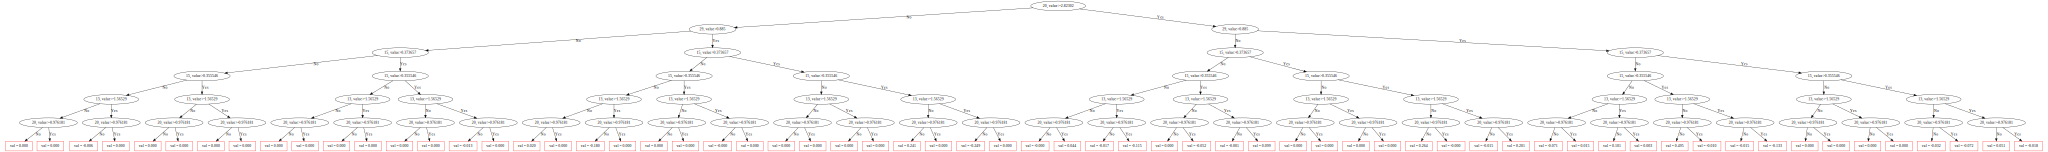

In [31]:
model.plot_tree(tree_idx = model.get_best_iteration())

### Inference

In [32]:
predictions = model.predict(test.get_features())
predictions_probs = model.predict_proba(test.get_features())

In [33]:
predictions[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
predictions_probs[0:10]

array([[9.99991695e-01, 8.30504115e-06],
       [9.99806822e-01, 1.93177551e-04],
       [9.99991894e-01, 8.10611269e-06],
       [9.99911412e-01, 8.85876800e-05],
       [9.98025893e-01, 1.97410747e-03],
       [9.99969925e-01, 3.00748424e-05],
       [9.99751088e-01, 2.48911524e-04],
       [9.99064114e-01, 9.35886375e-04],
       [9.99817211e-01, 1.82788685e-04],
       [9.68465361e-01, 3.15346391e-02]])

In [35]:
sklearn.metrics.accuracy_score(
    test.get_label(),
    model.predict(test.get_features())
)

0.9997893406361913

### Evaluation

In [36]:
# class labels
model.classes_

array([0, 1])

In [37]:
# confusion matrix
sklearn.metrics.confusion_matrix(test.get_label(), model.predict(test)).tolist()

[[28431, 1], [5, 45]]

In [38]:
# precision
sklearn.metrics.precision_score(test.get_label(), model.predict(test), average='macro')

0.9890425180573309

In [39]:
# recall
sklearn.metrics.recall_score(test.get_label(), model.predict(test), average='macro')

0.9499824141812043

In [40]:
# f1
sklearn.metrics.f1_score(test.get_label(), model.predict(test), average='macro')

0.9686972462544841

In [41]:
# average precision
sklearn.metrics.average_precision_score(test.get_label(), model.predict(test), average='macro')

0.8806103320785362

In [42]:
# fpr, tpr, threshold for ROC curve
fpr, tpr, threshold = sklearn.metrics.roc_curve(test.get_label(), model.predict_proba(test)[:, 1])

In [43]:
fpr[0:10], tpr[0:10], threshold[0:10]

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.51716376e-05,
        3.51716376e-05, 1.40686550e-04, 1.40686550e-04, 5.97917839e-04,
        5.97917839e-04, 6.33089477e-04]),
 array([0.  , 0.02, 0.88, 0.88, 0.9 , 0.9 , 0.92, 0.92, 0.94, 0.94]),
 array([       inf, 0.99860554, 0.81415366, 0.67835097, 0.641084  ,
        0.20736097, 0.18779968, 0.03497907, 0.03153464, 0.03115019]))

In [44]:
# confusion matrix
catboost.utils.get_confusion_matrix(model, test)

array([[2.8431e+04, 1.0000e+00],
       [5.0000e+00, 4.5000e+01]])

In [45]:
# fpr, tpr, thresholds for ROC curve
catboost.utils.get_roc_curve(model, test)

(array([0.        , 0.        , 0.        , ..., 0.99992966, 0.99996483,
        1.        ]),
 array([0.  , 0.02, 0.04, ..., 1.  , 1.  , 1.  ]),
 array([1.00000000e+00, 9.98538004e-01, 9.98463447e-01, ...,
        3.39514354e-07, 2.76701044e-07, 0.00000000e+00]))

### Inference Data Formats

In [46]:
example_df = fraud_ds[(fraud_ds['splits']=='TEST') & (fraud_ds['Class']==1)].iloc[0:1].drop(['Class', 'splits', 'transaction_id'], axis = 1)
example_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
9,64585.0,1.080433,0.962831,-0.278065,2.743318,0.412364,-0.320778,0.04129,0.17617,-0.966952,...,-0.172659,-0.008996,-0.057036,-0.053692,-0.026373,0.4003,0.072828,0.027043,0.063238,0.0


In [47]:
example_df_reordered = example_df.reindex(columns = np.random.permutation(example_df.columns))
example_df_reordered

,V15,V11,V19,V8,V22,V2,V23,V20,V16,V13,...,V3,V7,V4,V12,V9,Amount,V26,V24,V10,V21
9,0.398272,2.140057,-1.57707,0.17617,-0.057036,0.962831,-0.053692,-0.172659,1.367433,-1.191306,...,-0.278065,0.04129,2.743318,-0.276309,-0.966952,0.0,0.072828,-0.026373,-0.19412,-0.008996


In [48]:
example_series = example_df.iloc[0]
example_series_reordered = example_df_reordered.iloc[0]
example_series

Time      64585.000000
V1            1.080433
V2            0.962831
V3           -0.278065
V4            2.743318
V5            0.412364
V6           -0.320778
V7            0.041290
V8            0.176170
V9           -0.966952
V10          -0.194120
V11           2.140057
V12          -0.276309
V13          -1.191306
V14          -1.880275
V15           0.398272
V16           1.367433
V17           1.522662
V18           1.026317
V19          -1.577070
V20          -0.172659
V21          -0.008996
V22          -0.057036
V23          -0.053692
V24          -0.026373
V25           0.400300
V26           0.072828
V27           0.027043
V28           0.063238
Amount        0.000000
Name: 9, dtype: float64

In [49]:
example_np = example_df.to_numpy()
example_np_reordered = example_df_reordered.to_numpy()
example_np

array([[ 6.45850000e+04,  1.08043337e+00,  9.62830681e-01,
        -2.78065478e-01,  2.74331806e+00,  4.12364076e-01,
        -3.20778353e-01,  4.12895490e-02,  1.76170300e-01,
        -9.66951551e-01, -1.94120467e-01,  2.14005682e+00,
        -2.76308753e-01, -1.19130574e+00, -1.88027540e+00,
         3.98271956e-01,  1.36743302e+00,  1.52266170e+00,
         1.02631748e+00, -1.57707048e+00, -1.72658645e-01,
        -8.99617409e-03, -5.70361436e-02, -5.36915092e-02,
        -2.63732768e-02,  4.00299731e-01,  7.28277709e-02,
         2.70429343e-02,  6.32375727e-02,  0.00000000e+00]])

In [50]:
example_list = example_df.values.tolist()
example_list_reordered = example_df_reordered.values.tolist()
example_list

[[64585.0,
  1.08043336974687,
  0.962830680816555,
  -0.27806547765439,
  2.74331806279958,
  0.4123640756810779,
  -0.320778352962878,
  0.0412895489552235,
  0.176170299597767,
  -0.9669515510536291,
  -0.19412046650558104,
  2.1400568155366297,
  -0.276308752749667,
  -1.1913057375248899,
  -1.88027540328199,
  0.3982719563363761,
  1.36743302249318,
  1.52266169956075,
  1.02631748255981,
  -1.5770704784018401,
  -0.17265864456636498,
  -0.00899617409257402,
  -0.0570361435998535,
  -0.0536915092211487,
  -0.0263732767799466,
  0.40029973123052,
  0.0728277709127376,
  0.0270429343018625,
  0.0632375727147923,
  0.0]]

In [51]:
model.predict(example_df), model.predict(example_df_reordered)

(array([0]), array([0]))

In [52]:
model.predict(example_series), model.predict(example_series_reordered)

(0, 0)

In [53]:
model.predict(example_np), model.predict(example_np_reordered)

(array([0]), array([0]))

In [54]:
model.predict(example_list), model.predict(example_list_reordered)

(array([0]), array([0]))

In [55]:
examples_np = fraud_ds[(fraud_ds['splits']=='TEST') & (fraud_ds['Class']==1)].iloc[0:10].drop(['Class', 'splits', 'transaction_id'], axis = 1).to_numpy()

In [56]:
model.predict(examples_np[0])

0

In [57]:
model.predict(examples_np)

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1])

### Feature Importance

Use the trained model directly with the `shap` library for global and instance level feature attributions.

#### Calculate Shap Values

In [84]:
explainer = shap.TreeExplainer(model)

In [85]:
shap_values = explainer.shap_values(X)

#### Plot Global Feature Importance

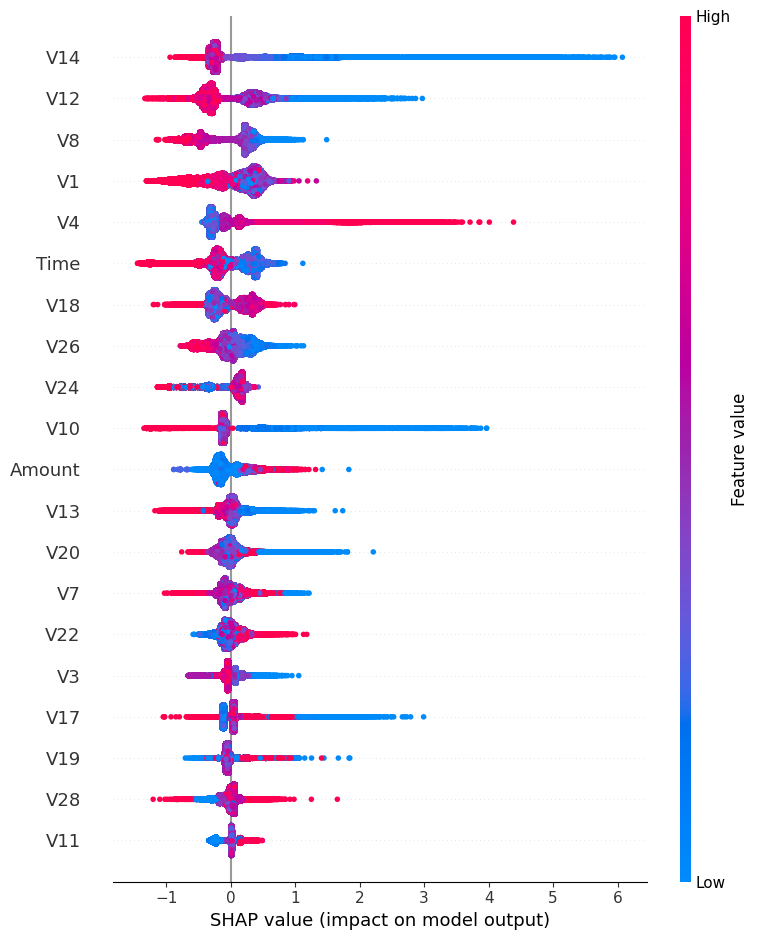

In [87]:
shap.summary_plot(shap_values, X, feature_names = [i for i in X.columns]) 
plt.show()

#### Plot Instance Level Feature Attribution

In [89]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0].tolist(), feature_names = [i for i in X.columns])
plt.show()

#### Dependence Plot

In [83]:
shap.dependence_plot("Time", shap_values, X, feature_names = [f'{i}' for i in X.columns[0]])
plt.show()

ValueError: Could not find feature named: Time

#### Interaction Values

In [ ]:
shap_interaction_values = explainer.shap_interaction_values(train)
shap.summary_plot(shap_interaction_values, X, feature_names = [i for i in X.columns])
plt.show()

---
## Model Files

Save and recall model files using GCS.

### Save To GCS

In [64]:
model_blob = bucket.blob(f'{SERIES}/{EXPERIMENT}/model.cbm')

with tempfile.NamedTemporaryFile() as temp_file:
    model.save_model(temp_file.name, format = 'cbm')
    model_blob.upload_from_filename(temp_file.name)

In [65]:
examples_blob = bucket.blob(f'{SERIES}/{EXPERIMENT}/examples.json')
examples_blob.upload_from_string(
    json.dumps(examples_np.tolist()),
    content_type = 'appliation/json'
)

In [66]:
list(bucket.list_blobs(prefix = f'{SERIES}/{EXPERIMENT}'))

[<Blob: statmike-mlops-349915, frameworks/catboost-overview/examples.json, 1741283573725924>,
 <Blob: statmike-mlops-349915, frameworks/catboost-overview/model.cbm, 1741283573323843>]

### Load From GCS

In [67]:
model_bytes = model_blob.download_as_bytes()
reload_model = catboost.CatBoostClassifier()
reload_model.load_model(blob = model_bytes)

In [68]:
reload_examples_np = np.array(
    json.loads(examples_blob.download_as_string())
)

In [69]:
reload_model.predict(examples_np)

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [70]:
reload_model.predict(reload_examples_np)

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1])

---
## Vertex AI Experiments

[Vertex AI Experiments](https://cloud.google.com/vertex-ai/docs/experiments/intro-vertex-ai-experiments) is covered in detail in this repository under the [MLOps](../../MLOps/readme.md) section for [Experiment Tracking](../../MLOps/Experiment%20Tracking/readme.md).

In short:
- Experiments is a service for tracking ana analyzing metrics, parameters and other data related to ML processes
- An [experiment is created or connected](https://cloud.google.com/vertex-ai/docs/experiments/create-experiment) with the SDK via `aiplatform.init(experiment = 'name for experiment here`)
- Information is logged to a [run created under an experiment](https://cloud.google.com/vertex-ai/docs/experiments/create-manage-exp-run) with `aiplatform.start_run(run = 'name for run here')`
- Log information with the SDK:
    - [Autolog](https://cloud.google.com/vertex-ai/docs/experiments/autolog-data) with `aiplatform.autolog()`
        - for supported frameworks
    - [Summary metrics](https://cloud.google.com/vertex-ai/docs/experiments/log-data#summary-metrics) with `aiplatform.log_metrics()`
    - [Time series metrics](https://cloud.google.com/vertex-ai/docs/experiments/log-data#time-series-metrics) with `aiplatform.log_time_series_metrics()`
        - This requires a backing Vertex AI TensorBoard resource
    - [Parameters](https://cloud.google.com/vertex-ai/docs/experiments/log-data#parameters) with `aiplatform.log_params()`
    - [Classification metrics](https://cloud.google.com/vertex-ai/docs/experiments/log-data#classification-metrics) with `aiplatform.log_classification_metrics()`
    - [Model Artifacts](https://cloud.google.com/vertex-ai/docs/experiments/log-models-exp-run) with `aiplatform.save_model()`
        - for supported frameworks
    - [Metadata Artifacts with Executions](https://cloud.google.com/vertex-ai/docs/experiments/track-executions-artifacts) using `aiplatform.start_execution`
- Manages runs with:
    - [End a run](https://cloud.google.com/vertex-ai/docs/experiments/create-manage-exp-run#end-run) with `aiplatform.end_run()`
    - [Resume a run](https://cloud.google.com/vertex-ai/docs/experiments/create-manage-exp-run#resume-run) to update/add to an existing run by adding the `resume = True` parameter to `aiplatform.stsart_run(run = '', resume = True)`
    - [Delete a run](https://cloud.google.com/vertex-ai/docs/experiments/create-manage-exp-run#delete-run) with the SDK's `ExperimentRun` method
    - [Change the status](https://cloud.google.com/vertex-ai/docs/experiments/create-manage-exp-run#manage-status) of a run with the SDK's `ExperimentRun` method

### Start An Experiment Run

In [68]:
try:
    aiplatform.start_run(run = EXPERIMENT)
except:
    aiplatform.start_run(run = EXPERIMENT, resume = True)

Associating projects/1026793852137/locations/us-central1/metadataStores/default/contexts/frameworks-catboost-overview to Experiment: frameworks


### Log Model Parameters

In [69]:
params = model.get_all_params()
for key, value in params.items():
    if type(value) in [dict, list]:
        params[key] = json.dumps(value)
        
aiplatform.log_params(params)

### Log Summary Metrics

In [70]:
for split in ['train', 'validate', 'test']:
    if split == 'train': dataset = train
    elif split == 'validate': dataset = validate
    elif split == 'test': dataset = test
    aiplatform.log_metrics(
        {
            f'{split}_accuracy' : sklearn.metrics.accuracy_score(dataset.get_label(), model.predict(dataset)),
            f'{split}_precision' : sklearn.metrics.precision_score(dataset.get_label(), model.predict(dataset), average='macro'),
            f'{split}_recall' : sklearn.metrics.recall_score(dataset.get_label(), model.predict(dataset), average='macro'),
            f'{split}_f1' : sklearn.metrics.f1_score(dataset.get_label(), model.predict(dataset), average='macro'),
            f'{split}_average_precision' : sklearn.metrics.average_precision_score(dataset.get_label(), model.predict(dataset), average='macro')        
        }
    )

### Log Classification Metrics

In [71]:
for split in ['train', 'validate', 'test']:
    if split == 'train': dataset = train
    elif split == 'validate': dataset = validate
    elif split == 'test': dataset = test
    
    
    fpr, tpr, threshold = sklearn.metrics.roc_curve(dataset.get_label(), model.predict_proba(dataset)[:, 1])
    aiplatform.log_classification_metrics(
        labels = [str(x) for x in model.classes_],
        matrix = sklearn.metrics.confusion_matrix(dataset.get_label(), model.predict(dataset)).tolist(),
        #fpr = fpr.tolist()[1:],
        #tpr = tpr.tolist()[1:],
        #threshold = threshold.tolist()[1:],
        display_name = split
    )

### Log Model Artifact

In [72]:
model_artifact = aiplatform.Artifact.create(
    schema_title = 'system.Model',
    schema_version = '0.0.1',
    display_name = 'Model For Example',
    uri = f"gs://{bucket.name}/{model_blob.name}",
)

In [73]:
with aiplatform.start_execution(
    schema_title = 'system.ContainerExecution',
    display_name = 'Train Model'
) as exc:
    exc.assign_output_artifacts([model_artifact])

In [74]:
model_artifact.uri

'gs://statmike-mlops-349915/frameworks/catboost-overview/model.cbm'

In [75]:
#dir(exc)

---
## Save Files For Companion Workflows

This section saves the model and some test instances to a local folder for use in companion workflows that use the model.

In [76]:
model.save_model(f'{DIR}/model.cbm', format = 'cbm')

In [77]:
with open(f'{DIR}/examples.json', 'w') as f:
    json.dump(examples_np.tolist(), f)

In [78]:
aiplatform.end_run()